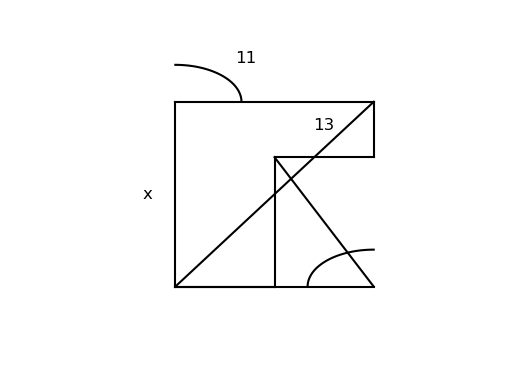

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_arc(center, radius, angle_range, label=None):
    angles = np.linspace(np.radians(angle_range[0]), np.radians(angle_range[1]), 50)
    x_arc = center[0] + radius * np.cos(angles)
    y_arc = center[1] + radius * np.sin(angles)
    plt.plot(x_arc, y_arc, 'k')
    if label:
        mid_angle = np.radians((angle_range[0] + angle_range[1]) / 2)
        label_x = center[0] + (radius + 1) * np.cos(mid_angle)
        label_y = center[1] + (radius + 1) * np.sin(mid_angle)
        plt.text(label_x, label_y, label, fontsize=12, ha='center')

# Define points
A = (0, 0)
B = (0, 10)
C = (6, 10)
D = (6, 7)
E = (3, 7)
F = (3, 0)
G = (6, 0)

# Draw the shape
edges = [
    (A, B), (B, C), (C, D), (D, E), (E, F), (F, A), (E, G)
]

for edge in edges:
    x_values, y_values = zip(*edge)
    plt.plot(x_values, y_values, 'k')

# Draw diagonal lines
plt.plot([A[0], C[0]], [A[1], C[1]], 'k')
plt.plot([A[0], G[0]], [A[1], G[1]], 'k')

# Draw arcs
draw_arc(B, 2, (0, 90), label='11')
draw_arc(G, 2, (90, 180))

# Add text labels
plt.text(-1, 5, 'x', fontsize=12, va='center')
plt.text(4.5, 8.5, '13', fontsize=12, ha='center')

# Configure plot
plt.xlim(-5, 10)
plt.ylim(-5, 15)
plt.axis('off')
plt.show()


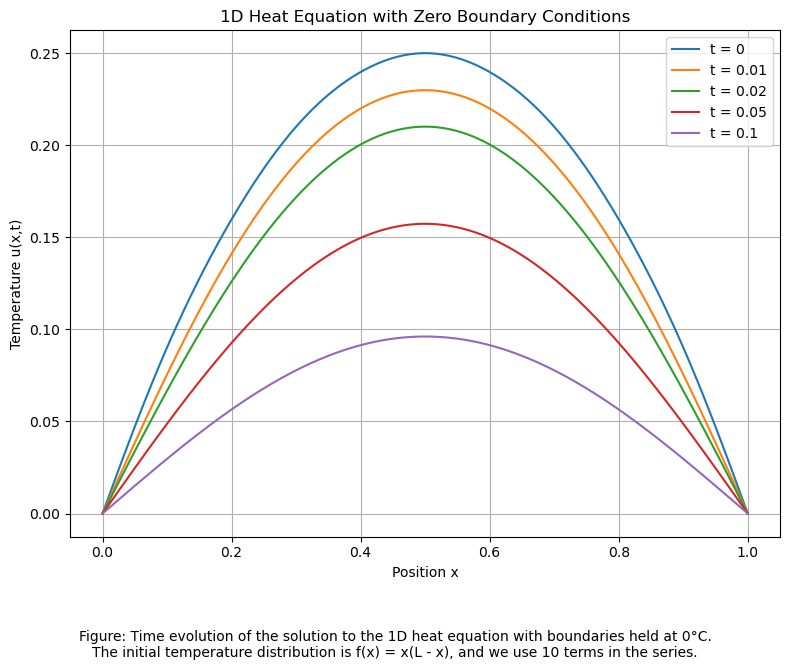

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# --- Parameters ---
L = 1.0          # Length of the 1D rod
k = 1.0          # Diffusion/thermal conductivity constant
N = 10           # Number of terms in the Fourier series
t_values = [0, 0.01, 0.02, 0.05, 0.1]  # Times at which we want to plot solutions
x = np.linspace(0, L, 200)            # Spatial grid for plotting

# --- Define the initial condition f(x). Modify as desired. ---
def f(x):
    # Example: a simple quadratic "bump"
    return x * (L - x)

# --- Compute Fourier coefficients b_n via integration. ---
#    b_n = (2/L) * integral_{0 to L} of f(x)*sin(n*pi*x/L) dx
def b_n(n):
    integrand = lambda xx: f(xx) * np.sin(n * np.pi * xx / L)
    val, _ = quad(integrand, 0, L)
    return (2.0 / L) * val

# Precompute b_n for all terms n = 1..N
b = np.array([b_n(n) for n in range(1, N+1)])

# --- Define the solution u(x,t) as a partial sum of the series. ---
#    u(x,t) = sum_{n=1..∞} [ b_n sin(n*pi*x/L) e^{-k*(n*pi/L)^2 t} ]
#    Here we truncate after N terms for illustration.
def u(x_val, t_val):
    s = 0.0
    for n in range(1, N+1):
        s += b[n-1] * np.sin(n * np.pi * x_val / L) \
             * np.exp(-k * (n * np.pi / L)**2 * t_val)
    return s

# --- Generate the plots for several time snapshots ---
plt.figure(figsize=(8, 6))
for t in t_values:
    u_vals = [u(xx, t) for xx in x]
    plt.plot(x, u_vals, label=f"t = {t}")

plt.title("1D Heat Equation with Zero Boundary Conditions")
plt.xlabel("Position x")
plt.ylabel("Temperature u(x,t)")
plt.grid(True)
plt.legend()

# --- Add a caption below the figure ---
caption = (
    "Figure: Time evolution of the solution to the 1D heat equation with boundaries held at 0°C.\n"
    "The initial temperature distribution is f(x) = x(L - x), and we use 10 terms in the series."
)
plt.figtext(0.5, -0.1, caption, ha="center", wrap=True)

plt.tight_layout()
plt.show()
